In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('D:/Data For Natural Language Processing with Disaster Tweets/nlp-getting-started.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('D:/Data For Natural Language Processing with Disaster Tweets/train.csv')
df_test = pd.read_csv('D:/Data For Natural Language Processing with Disaster Tweets/test.csv')

df_train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [52]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [53]:
df_train.info()

df_train['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


target
0    4342
1    3271
Name: count, dtype: int64

In [54]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [55]:
df_test.info()

df_test.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


id             0
keyword       26
location    1105
text           0
dtype: int64

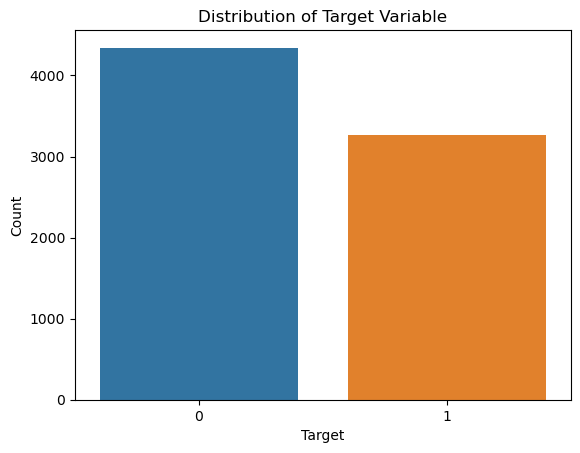

In [56]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df_train)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [57]:
disaster = df_train[df_train['target'] == 1]
print("Number of disaster related tweets:", len(disaster))

non_disaster = df_train[df_train['target'] < 1]
print("Number of non-disaster related tweets:", len(non_disaster))


Number of disaster related tweets: 3271
Number of non-disaster related tweets: 4342


In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove punctuation and stopwords
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    
    # Join the words back into a single string
    return ' '.join(words)

df_train['processed_text'] = df_train['text'].apply(preprocess_text)
df_train.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SaadLegion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SaadLegion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,processed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [59]:
df_test['processed_text'] = df_test['text'].apply(preprocess_text)
df_test.head()


,id,keyword,location,text,processed_text
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills china taiwan


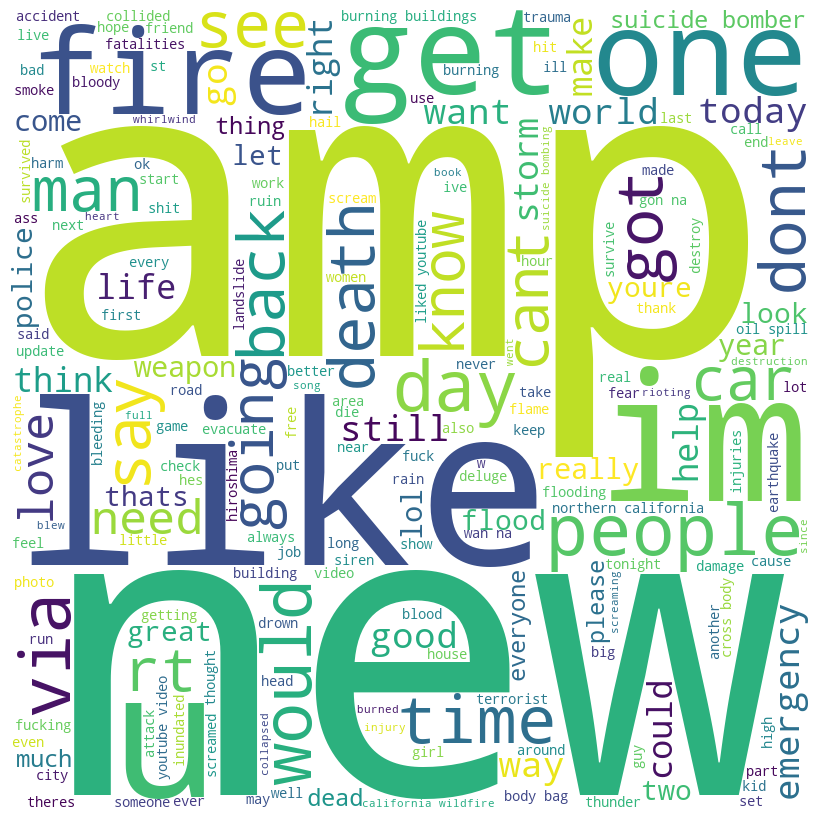

In [60]:
def word_cloud(text_series):
    stop_words = set(stopwords.words('english'))
    combined_text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=800, 
                          background_color='white', 
                          stopwords=stop_words, 
                          min_font_size=10).generate(combined_text)
    
    # Plot the WordCloud image                        
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 

word_cloud(df_train['processed_text'])

In [61]:
disaster_text = df_train[df_train['target'] == 1]['processed_text']

def word_frequency(text_series):
    stop_words = set(stopwords.words('english'))
    combined_text = ' '.join(text_series)
    words = word_tokenize(combined_text)
    word_freq = nltk.FreqDist(words)
    return word_freq

word_frequency(disaster_text)



FreqDist({'fire': 180, 'news': 140, 'via': 121, 'disaster': 117, 'california': 111, 'suicide': 110, 'police': 107, 'amp': 107, 'people': 105, 'killed': 93, ...})

In [62]:
non_disaster_text = df_train[df_train['target'] == 0]['processed_text']

def word_frequency(text_series):
    stop_words = set(stopwords.words('english'))
    combined_text = ' '.join(text_series)
    words = word_tokenize(combined_text)
    word_freq = nltk.FreqDist(words)
    return word_freq

word_frequency(non_disaster_text)



FreqDist({'like': 253, 'im': 248, 'amp': 193, 'new': 170, 'get': 163, 'dont': 154, 'one': 128, 'body': 113, 'via': 99, 'would': 97, ...})

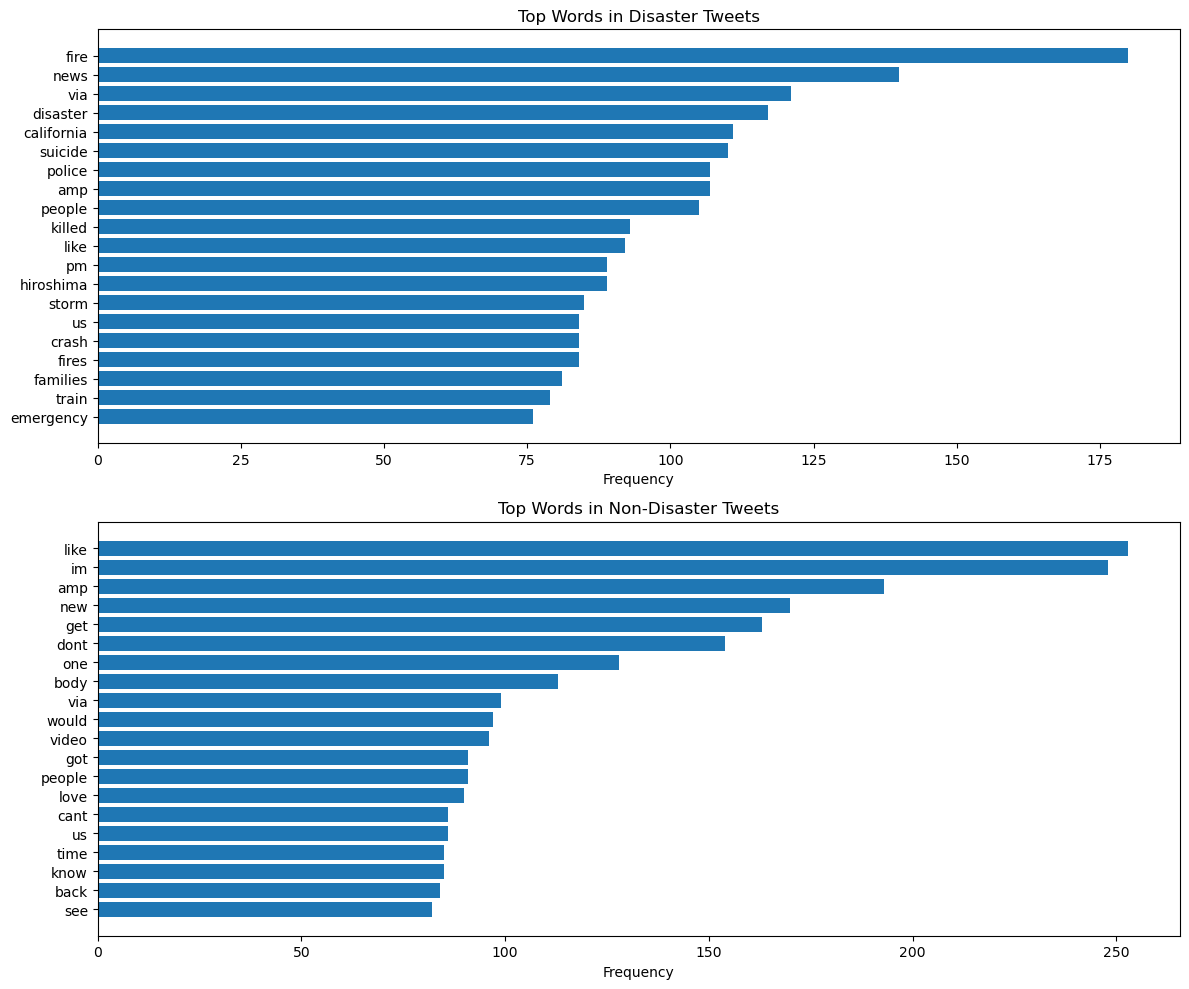

In [63]:
# Visualization of Word Frequencies for Disaster and Non-Disaster Tweets

import matplotlib.pyplot as plt

def plot_word_frequencies(disaster_freq, non_disaster_freq, top_n=20):
    # Get the top N most common words for each category
    disaster_top = dict(disaster_freq.most_common(top_n))
    non_disaster_top = dict(non_disaster_freq.most_common(top_n))
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot disaster word frequencies
    ax1.barh(list(disaster_top.keys()), list(disaster_top.values()))
    ax1.set_title('Top Words in Disaster Tweets')
    ax1.set_xlabel('Frequency')
    ax1.invert_yaxis()  # Invert y-axis to show most frequent at the top
    
    # Plot non-disaster word frequencies
    ax2.barh(list(non_disaster_top.keys()), list(non_disaster_top.values()))
    ax2.set_title('Top Words in Non-Disaster Tweets')
    ax2.set_xlabel('Frequency')
    ax2.invert_yaxis()  # Invert y-axis to show most frequent at the top
    
    plt.tight_layout()
    plt.show()

# Get word frequencies
disaster_freq = word_frequency(disaster_text)
non_disaster_freq = word_frequency(non_disaster_text)

# Plot the word frequencies
plot_word_frequencies(disaster_freq, non_disaster_freq)



In [64]:
# Text Preprocessing and Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Combine processed text from both disaster and non-disaster tweets
all_texts = df_train['processed_text'].tolist()

# Create labels (1 for disaster, 0 for non-disaster)
labels = df_train['target'].tolist()

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(all_texts, labels, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

print("TF-IDF vectorization completed.")
print("Training set shape:", X_train_tfidf.shape)
print("Validation set shape:", X_val_tfidf.shape)


TF-IDF vectorization completed.
Training set shape: (6090, 5000)
Validation set shape: (1523, 5000)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       874
           1       0.90      0.73      0.80       649

    accuracy                           0.85      1523
   macro avg       0.86      0.83      0.84      1523
weighted avg       0.85      0.85      0.84      1523

Epoch 2/4
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       874
           1       0.84      0.78      0.80       649

    accuracy                           0.84      1523
   macro avg       0.84      0.83      0.83      1523
weighted avg       0.84      0.84      0.84      1523

Epoch 3/4
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       874
           1       0.74      0.84      0.79       649

    accuracy                           0.80      1523
   macro avg       0.80      0.81      0.80      1523
weighted avg       0.81      0.80      0.80 

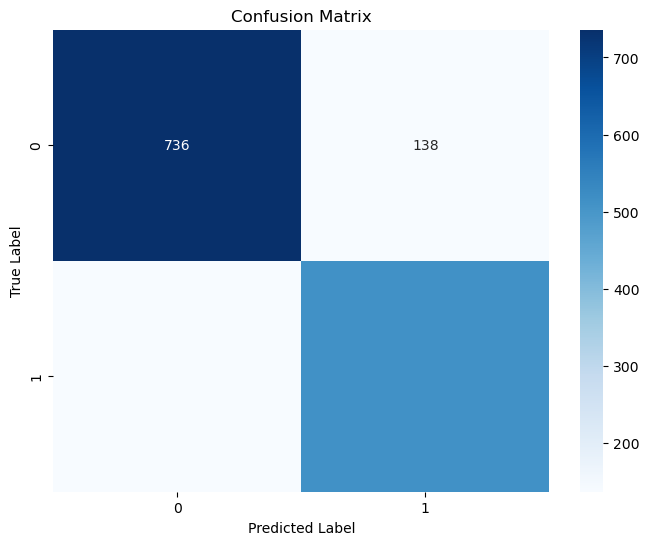

Submission file created: submission.csv


In [65]:
# Applying a pre-trained NLP model for text classification

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Prepare data
texts = df_train['text'].tolist()
labels = df_train['target'].tolist()

# Tokenize and encode sequences
max_length = 128
encoded_texts = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# Split the data
input_ids = encoded_texts['input_ids']
attention_masks = encoded_texts['attention_mask']
labels = torch.tensor(labels)

train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=42
)

# Create DataLoader
batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Set up optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

epochs = 4
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    # Validation
    model.eval()
    val_preds = []
    val_true = []
    with torch.no_grad():
        for batch in val_dataloader:
            batch = tuple(t.to(device) for t in batch)
            inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}
            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_true.extend(batch[2].cpu().numpy())
    
    print(f"Epoch {epoch+1}/{epochs}")
    print(classification_report(val_true, val_preds))

# Final evaluation
print("Final Evaluation:")
print(classification_report(val_true, val_preds))

# Confusion Matrix
cm = confusion_matrix(val_true, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Prepare test data
test_texts = df_test['text'].tolist()
test_encoded = tokenizer(test_texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')
test_dataset = TensorDataset(test_encoded['input_ids'], test_encoded['attention_mask'])
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Make predictions on test data
model.eval()
test_preds = []
with torch.no_grad():
    for batch in test_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        test_preds.extend(preds)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': df_test['id'],
    'target': test_preds
})

# Save submission to CSV
submission.to_csv('D:/Data For Natural Language Processing with Disaster Tweets/sample_submissionnnn.csv', index=False)
print("Submission file created: submission.csv")



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation: 100%|██████████████████████████████████████████████████████████████████████| 96/96 [00:07<00:00, 13.70it/s]


Epoch 1/3:
Train Loss: 0.4759
Validation Loss: 0.4162
Validation Accuracy: 0.8339



Validation: 100%|██████████████████████████████████████████████████████████████████████| 96/96 [00:04<00:00, 19.88it/s]


Epoch 2/3:
Train Loss: 0.3726
Validation Loss: 0.4059
Validation Accuracy: 0.8313



Validation: 100%|██████████████████████████████████████████████████████████████████████| 96/96 [00:04<00:00, 20.17it/s]


Epoch 3/3:
Train Loss: 0.3152
Validation Loss: 0.4667
Validation Accuracy: 0.8280

RoBERTa model training completed.
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       874
           1       0.79      0.80      0.80       649

    accuracy                           0.83      1523
   macro avg       0.82      0.82      0.82      1523
weighted avg       0.83      0.83      0.83      1523



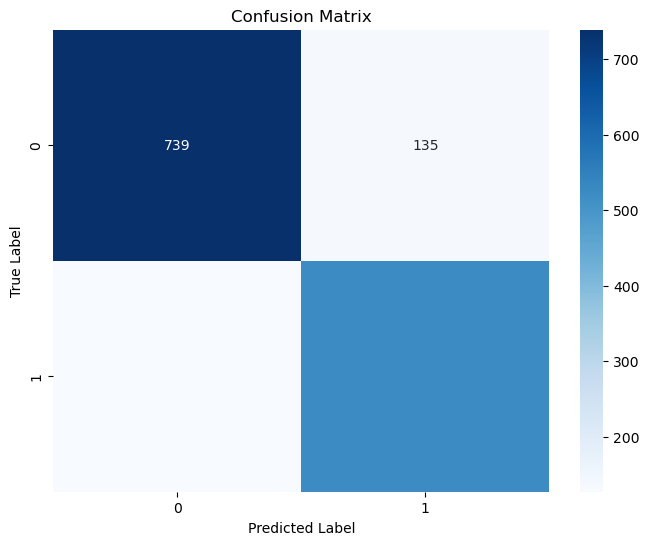

In [69]:
# Import necessary libraries
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Move model to GPU if available
model.to(device)

# Tokenize and encode the data
def encode_data(texts, max_length=128):
    return tokenizer.batch_encode_plus(
        texts,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

# Encode train and validation data
train_encodings = encode_data(X_train)
val_encodings = encode_data(X_val)

# Create DataLoader for training and validation
train_dataset = TensorDataset(
    train_encodings['input_ids'],
    train_encodings['attention_mask'],
    torch.tensor(y_train)
)
val_dataset = TensorDataset(
    val_encodings['input_ids'],
    val_encodings['attention_mask'],
    torch.tensor(y_val)
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Training settings
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0
    val_preds = []
    val_true = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc='Validation'):
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()
            val_preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
            val_true.extend(labels.cpu().numpy())
    
    # Print epoch results
    print(f'Epoch {epoch + 1}/{num_epochs}:')
    print(f'Train Loss: {train_loss / len(train_loader):.4f}')
    print(f'Validation Loss: {val_loss / len(val_loader):.4f}')
    print(f'Validation Accuracy: {np.mean(np.array(val_preds) == np.array(val_true)):.4f}')
    print()

print("RoBERTa model training completed.")

# Generate classification report
print("Classification Report:")
print(classification_report(val_true, val_preds))

# Generate and plot confusion matrix
cm = confusion_matrix(val_true, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()





Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



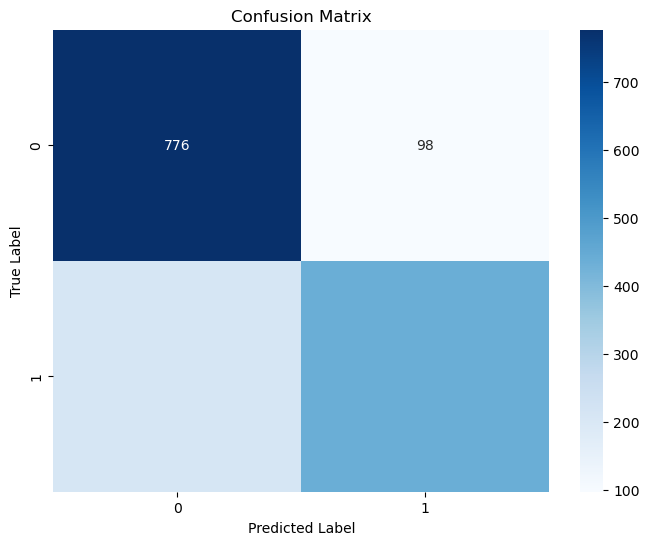

Accuracy: 0.80


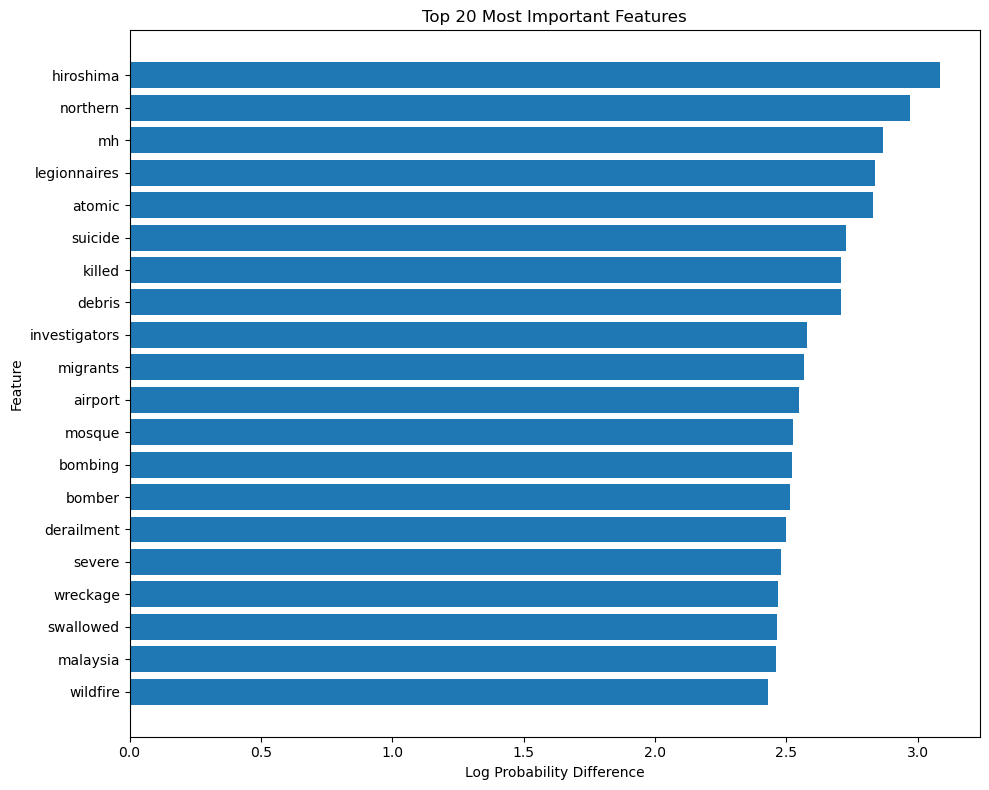

Model training, evaluation, and feature importance analysis completed.


In [68]:
# Model Training and Evaluation

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and print accuracy
accuracy = np.mean(y_pred == y_val)
print(f"Accuracy: {accuracy:.2f}")

# Feature importance analysis
feature_importance = nb_classifier.feature_log_prob_[1] - nb_classifier.feature_log_prob_[0]
top_features = np.argsort(feature_importance)[-20:]  # Get indices of top 20 features

# Get feature names
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Plot top features
plt.figure(figsize=(10, 8))
plt.barh(feature_names[top_features], feature_importance[top_features])
plt.title('Top 20 Most Important Features')
plt.xlabel('Log Probability Difference')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Model training, evaluation, and feature importance analysis completed.")
